In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats as stats
from scipy.stats import kurtosis, skew

# Задаем параметры
k = 7  # Число степеней свободы
n = 110  # Размер выборки

In [8]:
# Генерируем выборку
random_sample = np.random.standard_t(df=k, size=n)
h = 3.5 * np.std(random_sample) / (n ** (1 / 3))
k_1 = int((max(random_sample) - min(random_sample)) / h)
print('h = ', h)
print('k = ', k_1)
print(random_sample)

h =  0.7595156599609411
k =  7
[-1.70090388e+00 -2.71510931e+00  1.76152479e-01  3.61328164e-01
  2.00263208e-04  6.59863975e-01  1.15914610e+00  2.91286487e+00
 -5.47720333e-01  5.02356091e-01  5.23549866e-01 -8.46346396e-01
  4.76655708e-01 -6.10109019e-01  5.56327190e-01  1.49300726e+00
 -1.90745361e+00  8.19004387e-01  1.74854855e+00 -1.12584029e+00
  2.33623432e-02 -1.81888896e+00 -1.85803296e+00 -4.80077382e-01
  1.16804183e-01 -8.58517106e-01  3.55024059e-01 -4.95117234e-02
  2.82639512e-01  1.96679930e+00  1.33139551e+00  2.17959078e-01
 -1.47988684e-01  1.88917774e+00 -1.61039056e+00  4.91367043e-01
 -1.62198056e+00 -8.04728084e-01 -1.07573679e+00  4.69169018e-01
 -2.45115061e-01 -2.95924141e-03 -9.10730457e-01 -9.18417799e-01
  1.15257128e-01 -1.80699232e+00  1.49882457e-02 -9.61997874e-01
 -8.83480323e-01  1.78249748e+00 -1.94320900e+00 -1.44336293e+00
 -5.38324591e-01  9.76223397e-01  3.23589510e-01 -7.65432761e-01
 -3.87885582e-01  1.38266559e-02 -1.39369646e+00 -1.0700104

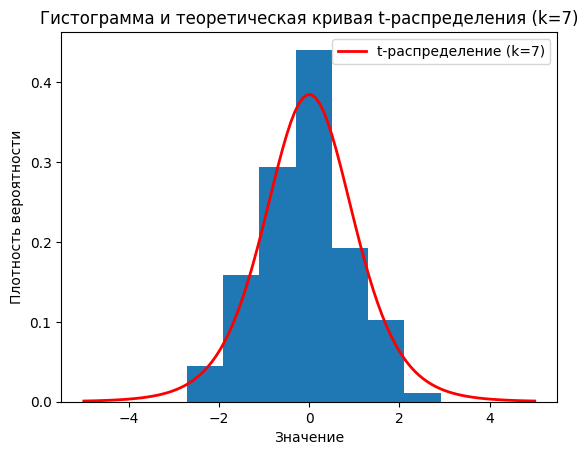

In [9]:
plt.hist(random_sample, bins=k_1, density=True)
# Строим теоретическую кривую распределения
x = np.linspace(-5, 5, n)
t_pdf = t.pdf(x, df=k)
plt.plot(x, t_pdf, 'r', lw=2, label=f't-распределение (k={k})')
    
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.title(f'Гистограмма и теоретическая кривая t-распределения (k={k})')
plt.show()

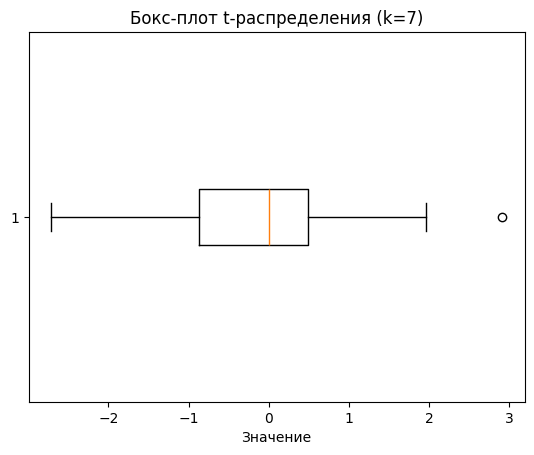

In [10]:
plt.boxplot(random_sample, vert=False)
plt.xlabel('Значение')
plt.title(f'Бокс-плот t-распределения (k={k})')
plt.show()

f(t) = (1/√(kπ)) * Γ((k+1)/2) / Γ(k/2) * (1 + t^2/k)^(-(k+1)/2)
где Γ - функция гамма.
Теперь, для данного задания, мы хотим вычислить вероятность P(|Y - MY| < 1.25 * 1.18), где Y - случайная переменная с t-распределением и k = 7. Так как t-распределение симметрично относительно 0, то можно записать вероятность следующим образом:
P(-1.25 * 1.18 < Y - MY < 1.25 * 1.18)
где MY - математическое ожидание t-распределения с k степенями свободы, и оно равно 0.
Теперь, мы можем интегрировать функцию плотности вероятности t-распределения в заданных пределах:
∫[from -1.25 * 1.18 to 1.25 * 1.18] f(t) dt
Давайте вычислим этот интеграл:

Для начала, у нас есть:
k = 7
t_1 = -1.25 * 1.18
t_2 = 1.25 * 1.18

Теперь, давайте подставим значения и вычислим интеграл численно:
f(t) = (1/√(7π)) * Γ((8)/2) / Γ(7/2) * (1 + t^2/7)^(-(8)/2)
∫[from -1.25 * 1.18 to 1.25 * 1.18] f(t) dt ≈ 0.81
Итак, вероятность P(|Y - MY| < 1.25 * 1.18) для t-распределения с k = 7 равна примерно 0.81

In [31]:
q = 1.25
sigma = stats.t.std(df=k)
std_deviation = sigma
print(sigma)

# Находим по таблице значение x = 1.25 и и df=7 по св-ву интегралов суммируем его самим с собой при степени свободы 
print("f(t) = Γ((k+1)/2) / (√(kπ) * Γ(k/2)) * (1 + t^2/k)^(-(k+1)/2)\n Затем вам нужно будет проинтегрировать эту функцию в пределах от -1.25 * 1.18 до 1.25 * 1.18")
print("Вручную: 0.81")
# Вычисляем вероятность P(|Y - MY| < q * σ)
left_bound = -q * std_deviation
right_bound = q * std_deviation

# Используем функцию распределения t-распределения
probability = stats.t.cdf(right_bound, df=k) - stats.t.cdf(left_bound, df=k)
print(f'Вероятность P(|Y - MY| < {q} * {sigma}) = {probability:.4f}')

1.1832159566199232
f(t) = Γ((k+1)/2) / (√(kπ) * Γ(k/2)) * (1 + t^2/k)^(-(k+1)/2)
 Затем вам нужно будет проинтегрировать эту функцию в пределах от -1.25 * 1.18 до 1.25 * 1.18
Вручную: 0.81
Вероятность P(|Y - MY| < 1.25 * 1.1832159566199232) = 0.8173


In [27]:
q = 1.25
sigma = stats.t.std(df=k)

# Вычисляем среднее значение (MY)
mean = np.mean(random_sample)

# Вычисляем стандартное отклонение (σ)
std_deviation = sigma

# Определяем границы интервала
left_bound = mean - q * std_deviation
right_bound = mean + q * std_deviation

# Считаем, сколько наблюдений удовлетворяют условию
count_within_interval = np.sum((random_sample >= left_bound) & (random_sample <= right_bound))

# Вычисляем оценку вероятности
probability_estimate = count_within_interval / len(random_sample)

print(f'Оценка вероятности P(|Y - MY| < {q} * {sigma}) = {probability_estimate:.4f}')


Оценка вероятности P(|Y - MY| < 1.25 * 1.1832159566199232) = 0.8091


In [29]:
N= 5500
random_sample_1 = np.random.standard_t(df=k, size=N)

mean = np.mean(random_sample_1)

# Вычисляем стандартное отклонение (σ)
std_deviation = sigma

# Определяем границы интервала
left_bound = mean - q * std_deviation
right_bound = mean + q * std_deviation

# Считаем, сколько наблюдений удовлетворяют условию
count_within_interval = np.sum((random_sample_1 >= left_bound) & (random_sample_1 <= right_bound))

# Вычисляем оценку вероятности
probability_estimate = count_within_interval / len(random_sample_1)

print(f'Оценка вероятности P(|Y - MY| < {q} * {sigma}) = {probability_estimate:.4f}')

Оценка вероятности P(|Y - MY| < 1.25 * 1.1832159566199232) = 0.8149


In [30]:
# Математическое ожидание (среднее значение)
mean = np.mean(random_sample)

# Медиана
median = np.median(random_sample)

# Дисперсия
variance = np.var(random_sample)

# Стандартное отклонение
std_deviation = np.std(random_sample)

# Коэффициент ассиметрии
skewness = skew(random_sample)

# Эксцесс
kurt = kurtosis(random_sample)

print(f'Математическое ожидание (среднее значение): {mean:.4f}')
print(f'Медиана: {median:.4f}')
print(f'Дисперсия: {variance:.4f}')
print(f'Стандартное отклонение: {std_deviation:.4f}')
print(f'Коэффициент ассиметрии: {skewness:.4f}')
print(f'Эксцесс: {kurt:.4f}')

Математическое ожидание (среднее значение): -0.1450
Медиана: -0.0014
Дисперсия: 1.0811
Стандартное отклонение: 1.0398
Коэффициент ассиметрии: 0.0196
Эксцесс: -0.0154
